#### Knn classifier using average blue and green pixel values per image

In [35]:
import pandas as pd
import csv
import matplotlib.image as plt_img
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [21]:
images = pd.read_csv('images.csv')



In [22]:
image_type = images['type']
image_name = ['shoreline, inland']
green = images['green']
blue = images['blue']



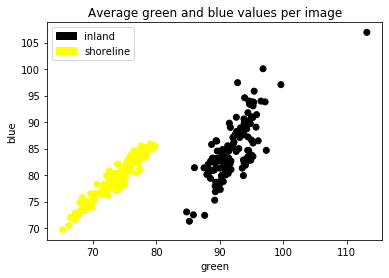

In [96]:
colormap = np.array(['black', 'yellow'])
plt.scatter(green, blue, c=colormap[image_type])
plt.xlabel('green')
plt.ylabel('blue')
shoreline = mpatches.Patch(color='black', label='inland')
inland = mpatches.Patch(color='yellow', label='shoreline')
plt.legend(handles=[shoreline,inland])
plt.title("Average green and blue values per image")
plt.savefig('avg_gb')
plt.show()

The scatter plot shows that we'll get good results with K nearest neighbors. Use knn to train the data

In [72]:
knn_images = images.drop(['name'], axis = 1)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(knn_images, image_type, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn_images.shape


(256, 3)

Input new values for test image and allow the model to predict whether it is shoreline or inland:


In [93]:
X_new = np.array([90,80, 3])
X_new = X_new.reshape(1, -1)
print(X_new.shape)

(1, 3)


In [94]:
prediction = knn.predict(X_new)
print(prediction)

[0]


"[0]" represents an inland target. Judging by the scatter plot, this is correct. Use .score to find the accuracy of model:

In [95]:
print(knn.score(X_test, y_test))

1.0
